<h1>Off Facebook Activity Report</h1>
<h3> Kay Shrieve </h3>
<h4> EMAT 22110 </h4>

In this report, I will be analyzing my facebook data. This data comes from the file "your_of_facebook_activity", which has been downloaded directly from my facebook account. In this report, I will show an analysis of the specific file in the facebook data and show a conclusion to a hypothesis about my facebook data. 

<h2>1. hypothesis </h2> 
facebook collects data about you and sells it to advertisers, websites, and applications, hoping you will click on their advertisments. my hypothesis is that my click through will be very high, as I am very susespetible to clickbait, and that I am probably shown a lot of advertisments for clothing sites or game apps based on my previous click throughs. 

In [105]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

In [106]:
with open (r"/Users/kaylashrieve/Desktop/JSON FBOOK/ads_and_businesses/your_off-facebook_activity.json") as f:
    act = json.load(f) 
act.keys()

dict_keys(['off_facebook_activity'])

In [107]:
type(act['off_facebook_activity'])

list

<h2> 2. the data </h2>
   This data comes from my personal facebook account, specifically the file "your_off_facebook_activity". This is reliable data to be working with since it was downloaded directly from my personal facebook account, following the steps provided to me by facebook on how to download my personal data. 

In [108]:
act['off_facebook_activity'][0]

{'name': 'shockbyte.com',
 'events': [{'id': 152858411957865,
   'type': 'PAGE_VIEW',
   'timestamp': 1611657720},
  {'id': 152858411957865, 'type': 'PAGE_VIEW', 'timestamp': 1610591880}]}

In [109]:
act['off_facebook_activity'][0]['events'][0]['type']

'PAGE_VIEW'

In [110]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'PAGE_VIEW'

True

<h2>3. data prep</h2>
i chose the loop method to prepare the data for visualization, which is selecting the value from the name key. i also create a dataframe using pandas, by creating an empty dataframe and assiging the lists of data to each collumn by name. i then determine wether each advertiser is a website or an app, and then add the type of advertisment it is to the dataframe under "categories"

In [111]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []
cats = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'COMPLETE_REGISTRATION']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))
    cats.append(len([x for x in i['events'] if x ['type'] == 'CATEGORY']))

In [112]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views', 'Category'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent['Category'] = cats
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,Category
0,shockbyte.com,2,0,0,0,0,0,2,0
1,tasteofhome.com,1,0,0,0,1,0,0,0
2,autocruitment.com,5,2,0,0,0,0,3,0
3,buzzfeed.com,616,0,591,0,3,0,22,0
4,Hulu,20,0,2,0,0,0,18,0


In [113]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views', 'Category']].loc[appbyevent['Event Count'] > 50]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,Category
3,buzzfeed.com,616,0,591,0,3,22,0
10,shein.com,52,0,0,0,11,30,0
12,kent.edu,260,0,0,0,201,59,0
95,cheezburger.com,138,0,0,0,138,0,0
167,Imgur,53,0,0,0,16,37,0
218,adultswim.com,64,0,0,0,0,64,0
396,TikTok - Make Your Day,3587,0,3566,0,0,0,0
407,Tinder,601,0,0,0,0,0,0
408,DoorDash - Food Delivery,113,0,0,0,0,0,0
413,Moodpath: Depression & Anxiety,154,0,154,0,0,0,0


In [114]:
sub_apps['App']

3                         buzzfeed.com
10                           shein.com
12                            kent.edu
95                     cheezburger.com
167                              Imgur
218                      adultswim.com
396             TikTok - Make Your Day
407                             Tinder
408           DoorDash - Food Delivery
413     Moodpath: Depression & Anxiety
457                             Tumblr
574                   Candy Crush Saga
736                       buzzfeed.com
743                          shein.com
745                           kent.edu
828                    cheezburger.com
900                              Imgur
951                      adultswim.com
1129            TikTok - Make Your Day
1140                            Tinder
1141          DoorDash - Food Delivery
1146    Moodpath: Depression & Anxiety
1190                            Tumblr
1307                  Candy Crush Saga
Name: App, dtype: object

In [115]:
cats = ['site','site','site','site','site','site','app','app','app','app','app','site','site','site','site','site','site','site','app','app','app','app','app','app']
len(cats)

24

In [116]:
sub_apps['Category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,Category
3,buzzfeed.com,616,0,591,0,3,22,site
10,shein.com,52,0,0,0,11,30,site
12,kent.edu,260,0,0,0,201,59,site
95,cheezburger.com,138,0,0,0,138,0,site
167,Imgur,53,0,0,0,16,37,site
218,adultswim.com,64,0,0,0,0,64,site
396,TikTok - Make Your Day,3587,0,3566,0,0,0,app
407,Tinder,601,0,0,0,0,0,app
408,DoorDash - Food Delivery,113,0,0,0,0,0,app
413,Moodpath: Depression & Anxiety,154,0,154,0,0,0,app


<h2>4.visulization</h2>

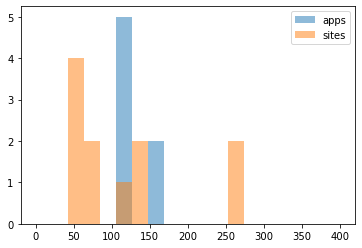

In [117]:
bins = np.linspace(0, 400, 20)
plt.hist(sub_apps['Event Count'].loc[sub_apps['Category'] == 'app'], bins, alpha = 0.5, label = "apps")
plt.hist(sub_apps['Event Count'].loc[sub_apps['Category'] == 'site'], bins, alpha = 0.5, label = "sites")
plt.legend(loc = 'upper right')
plt.show()

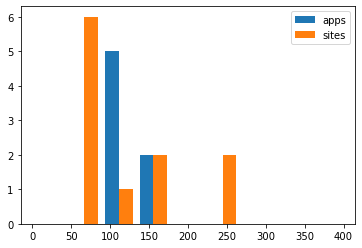

In [118]:
bins = np.linspace(0, 400, 10)
apps = sub_apps['Event Count'].loc[sub_apps['Category'] == 'app']
sites = sub_apps['Event Count'].loc[sub_apps['Category'] == 'site']
plt.hist([apps, sites], bins, label = ['apps', 'sites'])
plt.legend(loc = 'upper right')
plt.show()

The two graphs indicate that websites are advertised to me much more often than applications are. 

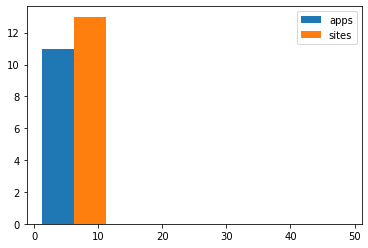

In [119]:
bins = np.linspace(0, 50, 5)
apps = sub_apps['Activate App'].loc[sub_apps['Category'] == 'app']
sites = sub_apps['Activate App'].loc[sub_apps['Category'] == 'site']
plt.hist([apps, sites], bins, label = ['apps', 'sites'])
plt.legend(loc = 'upper right')
plt.show()

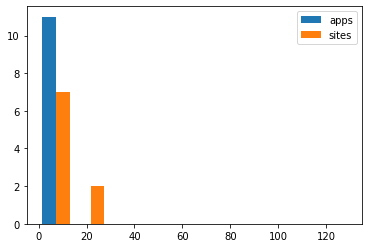

In [120]:
bins = np.linspace(0, 130, 10)
apps = sub_apps['View Content'].loc[sub_apps['Category'] == 'app']
sites = sub_apps['View Content'].loc[sub_apps['Category'] == 'site']
plt.hist([apps, sites], bins, label = ['apps', 'sites'])
plt.legend(loc = 'upper right')
plt.show()

However, in these two graphs, I tend to click through and activate apps more than I tend to click through websites. It is still less than I thought, but more than sites. 

<h2>5. conclusion </h2> 
Hypothesis: I will be advertised to by a lot of clothing apps/sites and games, and my clickthrough / activation rate of these will be very high. 

In actuality these are the top 12 apps and sites that advertise to me on Facebook: 

Buzzfeed.com
Shein.com
Kent.edu
Cheezburger.com
Imgur
Adultswim.com
TikTok
Tinder
Doordash 
Moodpath 
Tumblr 
Candy Crush 

Of the top 12, only one is a clothing brand and one is a game. I also have an activation event for none of these. Within the dataframe, I did view the content that was being advertised for the top 5 of these even though there was no activation events. 

However, I overall tend to have activation events for apps more than I do sites, even though I am advertised sites more than apps. 